# **Рејлијев (Стоксов први) проблем**

## **График функције $\displaystyle f(x) = e^{-x^2}$**

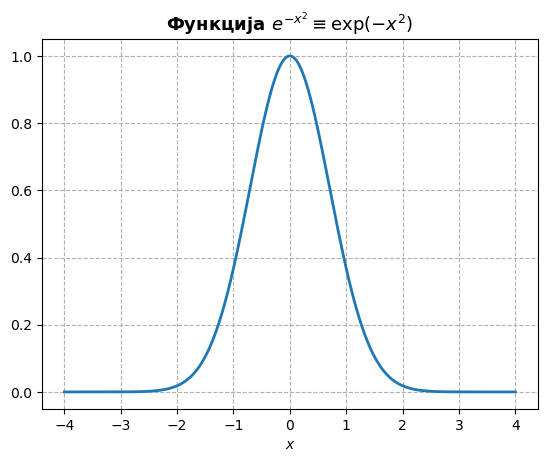

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as func

x = np.linspace(-4, 4, 1000)
f1 = np.exp(-x**2)
plt.xlabel('$x$')
plt.title("Функција $е^{-x^2} \equiv \exp(-x^2)$", size=13, weight='semibold')
plt.grid(True, linestyle='dashed')
plt.plot(x, f1, lw =2)

## **График функције $f(x) = \mathrm{erf}(x)$**

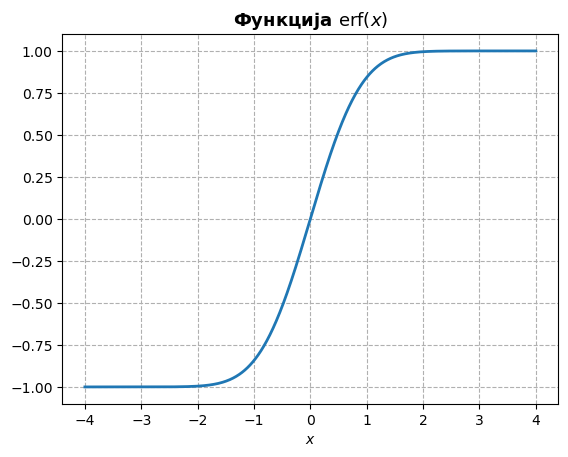

In [71]:
f2 = func.erf(x)
plt.xlabel('$x$')
plt.title("Функција $\mathrm{erf}(x)$", size=13, weight='semibold')
plt.grid(True, linestyle='dashed')
plt.plot(x, f2, lw =2)

## **График функције $f(x) = \mathrm{erfc}(x)\equiv 1 - \mathrm{erf}(x)$**

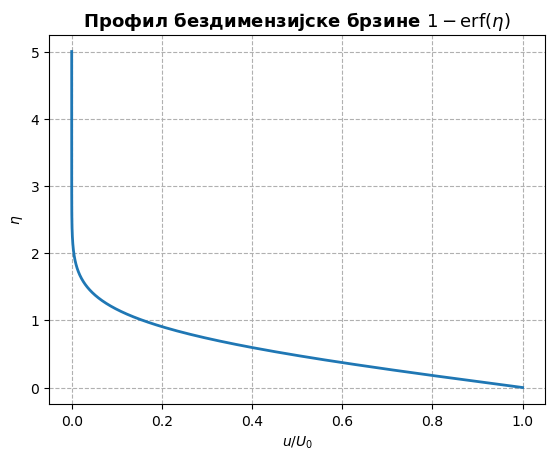

In [72]:
eta = np.linspace(0, 5, 500)
u = 1 - func.erf(eta)
plt.xlabel('$u/U_0$')
plt.ylabel('$\eta$')
plt.title("Профил бездимензијске брзине $1 - \mathrm{erf}(\eta)$", size=13, weight='semibold')
plt.grid(True, linestyle='dashed')
plt.plot(u, eta, lw =2)

## **Профили брзина у различитим временским тренуцима**

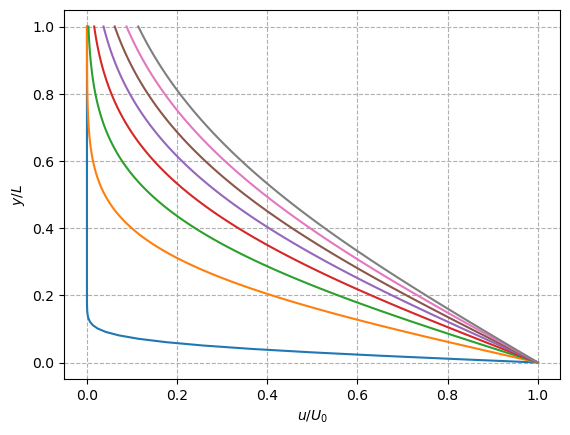

In [104]:
t = np.linspace(1e-3, 0.2, 8)
y = np.linspace(0, 1, 100)
plt.grid(True, linestyle='dashed')
plt.xlabel("$u/U_0$")
plt.ylabel("$y/L$")
for element in np.nditer(t):
    u_U0 = 1 - func.erf(y/(2*np.sqrt(element))) 
    plt.plot(u_U0, y)

## **Нумеричка интеграција диференцијалне једначине $f^{\prime\prime} + 2\eta f^{\prime} = 0$**

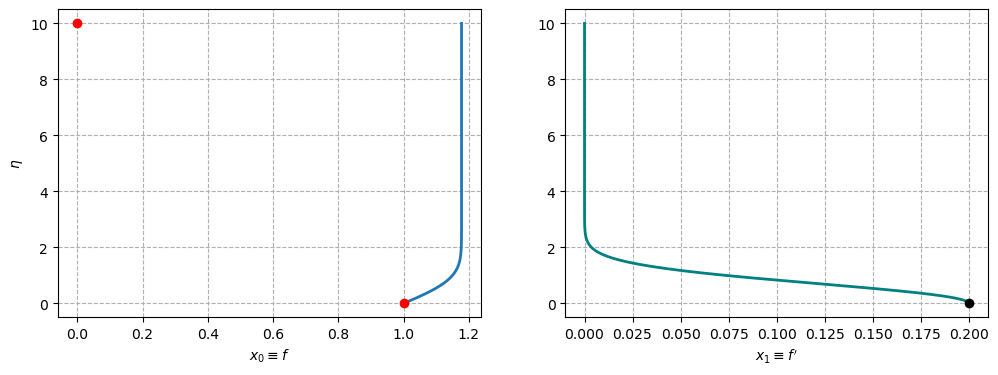

In [69]:
%clear
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import  odeint
from scipy.optimize import fsolve

def ode_fun(x, t):
    x0, x1 = x
    dx0dt = x1
    dx1dt = -2*t*x1
    return [dx0dt, dx1dt]

x0_0 = 1 # познат гранични услов на левој граници
x0_L = 0 # познат гранични услов на десној граници

x1_0 = 0.2
t = np.linspace(0, 10, 500)

#def cilj(x1_0):
#   x = odeint(ode_fun, [x0_0, x1_0], t)
#   x0 = x[:, 0]
#   return x0[-1] - x0_L
#x1_0 = fsolve(cilj, 1)

x = odeint(ode_fun, [x0_0, x1_0], t)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.xlabel("$x_0 \equiv f$")
plt.ylabel("$\eta$")
plt.plot(x[:, 0], t, lw = 2)
plt.grid(True, linestyle='dashed')
plt.scatter(x0_L, 10, color='red', zorder=2)
plt.scatter(x0_0, 0, color='red', zorder=2)
plt.subplot(1,2,2)
plt.xlabel("$x_1 \equiv f^{\prime}$")
plt.plot(x[:, 1], t, lw = 2, color = 'teal')
plt.scatter(x[0,1], 0, color='black', zorder=2)
plt.grid(True, linestyle='dashed')

## 